# Lab-P13: Analyzing World Data with SQL

In this lab, you'll get practice with writing SQL queries and various plotting functions.

# Segment 1: Setup

### Task 1.1: Import the required modules

In [238]:
import os
import math
import sqlite3
import requests
import matplotlib

import numpy as np
import pandas as pd

In [239]:
%matplotlib inline 

### Task 1.2: Write a download function to download QSRankings.json and save it to your lab folder

Warning: For the lab and the project, do not download the dataset QSranking.json manually (you must write Python code to download this automatically, as in p12). When we run the autograder, this file QSranking.json will not be in the directory. So, unless your main.ipynb downloads this file, you will get a zero score on the project. Also, make sure your download function includes code to check if the file already exists. The TAs will manually deduct points otherwise.

In [240]:
# Functions to write a file and to read a file

def write_file(path, data):
    '''This function writes the data into a file at given path'''
    with open(path, 'w', encoding="utf-8") as f:
        f.write(data)
        f.close()

In [241]:
# TODO: Copy your download function from p12 and download QSRanking.json

def download(filename, url):
    '''This function downloads the data from the given url
       into a file with the filename provided'''
    if os.path.exists(str(filename)):
        return str(filename) + " already exists!"

    try:
        r = requests.get(url)
        r.raise_for_status()
        data_text = r.text
        
        write_file(str(filename), data_text)
        
    except requests.HTTPError as e:
        print("oops!!", e)
               
    return str(filename) + " created!"

# Make sure your download function works by downloading QSRankings.json:

url = "https://raw.githubusercontent.com/msyamkumar/cs220-s22-projects/main/p13/QSranking.json"

download("QSranking.json", url)


'QSranking.json already exists!'

### Task 1.3: Create a database called 'rankings.db' out of 'QSRankings.json'

Check out the [Database 1](https://github.com/tylerharter/caraza-harter-com/blob/master/tyler/meena/cs220/s22/materials/meena_lec_notes/lec-32/lec_32_database1.ipynb) lecture for information.

In [248]:
# TODO: Load the data from QSranking.json into a variable called df1 using pandas's read_json

df1 = pd.read_json("QSranking.json")

# TODO: connect to 'rankings.db' and save it to a variable called conn

conn = sqlite3.connect("rankings.db")

# We'll give you this line since it wasn't covered in lecture
# It writes a dataframe's contents to a sqlite database

df1.to_sql("rankings", conn, if_exists="replace", index=False)


### Task 1.4: Read all the rows in rankings (the database table)

You'll have to use pandas's read_sql function to make a query.

In [249]:
# TODO: use pandas's read_sql function to query all rows in rankings. Save this to a variable called df

df = pd.read_sql("SELECT * FROM rankings", conn)

assert len(df) == 1201
assert df.iloc[0]["country"] == "United States"
assert df.iloc[-1]["institution_name"] == "Wake Forest University"

df


,rank,year,institution_name,country,academic_reputation,employer_reputation,faculty_student_score,citations_per_faculty,international_faculty,international_students,overall_score
0,1,2018,Massachusetts Institute Of Technology,United States,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,2,2018,Stanford University,United States,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,3,2018,Harvard University,United States,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,4,2018,California Institute Of Technology,United States,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,5,2018,University Of Cambridge,United Kingdom,100.0,100.0,100.0,78.3,97.4,97.7,95.6
...,...,...,...,...,...,...,...,...,...,...,...
1196,395,2020,Kobe University,Japan,24.6,27.4,58.3,15.4,10.2,9.0,28.4
1197,395,2020,Tampere University,Finland,24.8,30.7,29.0,38.1,29.2,8.6,28.4
1198,395,2020,The American University In Cairo,Egypt,24.6,37.4,43.7,5.7,93.9,3.8,28.4
1199,398,2020,University Of St Gallen,Switzerland,9.7,66.4,8.1,31.8,100.0,93.5,28.3


# Segment 2: SQL Practice

In practice, we often are more interested in writing more specific queries about our data. For example, we might be interested in finding institutions in the United States, or data collected in the year 2018, or both. With SQL, WHERE and AND clauses can help filter the data accordingly.

### Task 2.1: Use WHERE to find institutions in the United States


In [250]:
query1 = pd.read_sql("""
SELECT *
FROM rankings
WHERE country == 'United States'
""", conn)

# TODO: Keep only the institution_name column, remove any duplicate names.

unique_usa_insts = query1.institution_name.unique()

# TODO: Save these institution names to a list (not DataFrame!) called US_institutions.

US_institutions = unique_usa_insts.tolist()

assert "University Of Wisconsin-Madison" in US_institutions
assert "Tampere University" not in US_institutions
assert "Tampere University" in list(df["institution_name"])

US_institutions


['Massachusetts Institute Of Technology',
 'Stanford University',
 'Harvard University',
 'California Institute Of Technology',
 'University Of Chicago',
 'Princeton University',
 'Cornell University',
 'Yale University',
 'Johns Hopkins University',
 'Columbia University',
 'University Of Pennsylvania',
 'Duke University',
 'University Of Michigan',
 'University Of California, Berkeley',
 'Northwestern University',
 'University Of California, Los Angeles',
 'University Of California, San Diego',
 'Carnegie Mellon University',
 'New York University',
 'Brown University',
 'University Of Wisconsin-Madison',
 'University Of Washington',
 'University Of Texas At Austin',
 'University Of Illinois At Urbana-Champaign',
 'Georgia Institute Of Technology',
 'University Of North Carolina, Chapel Hill',
 'Boston University',
 'Ohio State University',
 'Rice University',
 'Pennsylvania State University',
 'Washington University In St. Louis',
 'Purdue University',
 'University Of California, Dav

### Task 2.2 Add an AND clause to find institutions in the United States with at least 70 overall score

In [70]:
# TODO: Copy your query from task 2.1, and update it to only select rows with an overall score of atleast 70

query2 = pd.read_sql("""
SELECT *
FROM rankings
WHERE country == 'United States' AND overall_score >= 70
""", conn)

score_70_usa_insts = query2.institution_name.unique()

US_institutions = score_70_usa_insts.tolist()

assert "Massachusetts Institute Of Technology" in US_institutions
assert "University Of Wisconsin-Madison" in US_institutions
assert "Wake Forest University" not in US_institutions
assert "University of Connecticut" not in US_institutions

US_institutions


['Massachusetts Institute Of Technology',
 'Stanford University',
 'Harvard University',
 'California Institute Of Technology',
 'University Of Chicago',
 'Princeton University',
 'Cornell University',
 'Yale University',
 'Johns Hopkins University',
 'Columbia University',
 'University Of Pennsylvania',
 'Duke University',
 'University Of Michigan',
 'University Of California, Berkeley',
 'Northwestern University',
 'University Of California, Los Angeles',
 'University Of California, San Diego',
 'Carnegie Mellon University',
 'New York University',
 'Brown University',
 'University Of Wisconsin-Madison',
 'University Of Washington',
 'University Of Texas At Austin',
 'University Of Illinois At Urbana-Champaign',
 'Georgia Institute Of Technology']

### Task 2.3 Use an ORDER BY clause to display the top 5 institutions by academic reputation in 2019

In addition to WHERE and AND, the ORDER BY keyword helps organize data even further. Much like the sort_values() function in pandas, the ORDER BY clause can be used to organize the result of the query in increasing (ASC) or decreasing (DESC) order based on a column's values.

In [255]:
# TODO: Write a new query to select rows in rankings where the year is 2019.
# TODO: Use ORDER BY and LIMIT to select the top 5 rows with the highest academic_reputation.
# TODO: Save these institution names to a list (not DataFrame!) called top_5.

query3 = pd.read_sql("""
SELECT *
FROM rankings
WHERE year == 2019
ORDER BY academic_reputation DESC
limit 5
""", conn)

top_5 = query3.institution_name.tolist()

assert len(top_5) == 5
assert top_5[0] == "Massachusetts Institute Of Technology"
assert top_5[-1] == "University Of Cambridge"

top_5


['Massachusetts Institute Of Technology',
 'Stanford University',
 'Harvard University',
 'University Of Oxford',
 'University Of Cambridge']

### Task 2.4 Update your query from task 2.3 to sort institutions in 2019 by academic reputation, then by citations_per_faculty

If you print out the resulting dataframe from your query, you might notice that all 5 rows have the same academic reputation. This makes it hard to compare the universities, so we will add some tiebreaking rules. If two universities have the same academic_reputation, then we should compare them by citations_per_faculty instead. Sometimes, in conversation, programmers abbreviate this by saying: "sort by academic_reputation, then by citations_per_faculty". 

In [260]:
# TODO: Copy your query from task 2.3, and modify the ORDER BY to add this tiebreaking behavior.
# TODO: Save these institution names to a list (not DataFrame!) called top_5_with_tiebreak.

query4 = pd.read_sql("""
SELECT *
FROM rankings
WHERE year == 2019
ORDER BY academic_reputation DESC, citations_per_faculty DESC 
LIMIT 5
""", conn)

top_5_with_tiebreak = query4.institution_name.tolist()

assert top_5_with_tiebreak[0] == "University Of California, Berkeley"
assert top_5_with_tiebreak[-1] == "University Of California, Los Angeles"

top_5_with_tiebreak


['University Of California, Berkeley',
 'Massachusetts Institute Of Technology',
 'Harvard University',
 'Stanford University',
 'University Of California, Los Angeles']

### Task 2.5 Use a GROUP BY clause and SUM aggregate function to get the total number of international_students for each country in 2019

The GROUP BY keyword groups rows that have the same value. It is often used with aggregate functions, such as COUNT, SUM, AVG, etc. to obtain a summary about groups in the data.

For example, to answer the question "What is the average rank of each country's institutions?", we could GROUP BY the country and use the AVG aggregate function to get the average rank of each country.

The output of your query will be a DataFrame with 2 columns: country and the sum of the international_students for that country

In [73]:
# TODO: Write a new query that uses GROUP BY and SUM to get 
# the total number of international students in each country

# TODO: Save the resulting DataFrame into a variable called intl_students_by_country.

query5 = pd.read_sql("""
SELECT country, SUM(international_students)
FROM rankings
WHERE year == 2019
GROUP BY Country
""", conn)

intl_students_by_country = query5

assert math.isclose(intl_students_by_country[intl_students_by_country["country"] == "Japan"].iloc[0][1], 280.9)
assert math.isclose(intl_students_by_country[intl_students_by_country["country"] == "Australia"].iloc[0][1], 1895.5)
assert math.isclose(intl_students_by_country[intl_students_by_country["country"] == "United States"].iloc[0][1], 3675.0)

intl_students_by_country


,country,SUM(international_students)
0,Argentina,170.2
1,Australia,1895.5
2,Austria,336.1
3,Belarus,24.4
4,Belgium,374.0
5,Brazil,12.4
6,Brunei,65.7
7,Canada,957.1
8,Chile,13.4
9,China,296.9


### Task 2.6 Use the AS keyword to rename the new column from task 2.5 to total_international_students

Although the dataframe does have a column for the sum of international students for each country, the name of the column looks strange:

```
SUM(`international_students`)
```

In SQL, the AS keyword allows us to rename the columns we create with our queries to make the resulting dataframe easier to understand.

In [261]:
# TODO: Paste your query from task 2.5 and modify it so the SUM column has the name total_international_students
# TODO: Save the resulting DataFrame into a variable called intl_students_by_country_renamed.

query6 = pd.read_sql("""
SELECT country, SUM(international_students) AS total_international_students
FROM rankings
WHERE year == 2019
GROUP BY Country
""", conn)

intl_students_by_country_renamed = query6

assert "total_international_students" in intl_students_by_country_renamed.columns
assert math.isclose(intl_students_by_country_renamed[intl_students_by_country_renamed["country"] == "Japan"]["total_international_students"], 280.9)
assert math.isclose(intl_students_by_country_renamed[intl_students_by_country_renamed["country"] == "Australia"]["total_international_students"], 1895.5)
assert math.isclose(intl_students_by_country_renamed[intl_students_by_country_renamed["country"] == "United States"]["total_international_students"], 3675.0)

intl_students_by_country_renamed


,country,total_international_students
0,Argentina,170.2
1,Australia,1895.5
2,Austria,336.1
3,Belarus,24.4
4,Belgium,374.0
5,Brazil,12.4
6,Brunei,65.7
7,Canada,957.1
8,Chile,13.4
9,China,296.9


### Task 2.7 Use the HAVING keyword to only keep countries with more than 1000 international students

In addition to WHERE, the HAVING keyword is useful for filtering GROUP BY queries. Whereas WHERE filters the number of rows, HAVING filters the number of groups.

In [262]:
# TODO: Paste your query from task 2.6 and modify it so that it only returns 
# countries and total_international_students with more than 1000 international students

# TODO: Save the resulting DataFrame into a variable called intl_students_by_country_more_than_1000

query7 = pd.read_sql("""
SELECT country, SUM(international_students) AS total_international_students
FROM rankings
WHERE year == 2019
GROUP BY Country
HAVING total_international_students > 1000
""", conn)

intl_students_by_country_more_than_1000 = query7

assert len(intl_students_by_country_more_than_1000) == 4
assert "Australia" in list(intl_students_by_country_more_than_1000["country"])
assert "Germany" in list(intl_students_by_country_more_than_1000["country"])
assert "United Kingdom" in list(intl_students_by_country_more_than_1000["country"])
assert "United States" in list(intl_students_by_country_more_than_1000["country"])

intl_students_by_country_more_than_1000


,country,total_international_students
0,Australia,1895.5
1,Germany,1012.6
2,United Kingdom,4275.2
3,United States,3675.0


# Segment 3: Plotting

SQL provides powerful tools to manipulate and organize data. Now we might be interested in plotting the data to engage in data exploration and visualize our results.

In the below plotting functions, `df` is the DataFrame containing the data to plot, `x` is the name of the column to plot on the x-axis, and `y` is the name of the column to plot on the y-axis.

### Task 3.1: Use a bar plot to plot the data from task 2.7

Your plot should look like this:

![Bar Plot Image](https://github.com/msyamkumar/cs220-s22-projects/raw/main/lab-p13/images/barplot.png/)

See these lectures for reference:  
[Line Plots and Stacked/Clustered Bar Plots](https://github.com/tylerharter/caraza-harter-com/blob/master/tyler/meena/cs220/s22/materials/readings/line-and-bar.ipynb)  
[Matplotlib Intro](https://github.com/tylerharter/caraza-harter-com/blob/master/tyler/meena/cs220/s22/materials/readings/matplotlib-intro.ipynb)


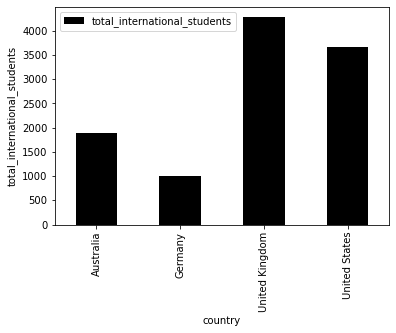

In [263]:
def bar_plot(df, x, y):
    df = df.set_index(x)
    ax = df.plot.bar(color='black', legend = False)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
# TODO: Use the bar_plot function to show the data from task 2.7. The country
# name should be on the x axis, and total_international_students should be
# on the y axis

bar_plot(intl_students_by_country_more_than_1000, 'country', 'total_international_students')


### Task 3.2: Use a scatter plot to plot the relationship between employer_reputation and academic_reputation in 2019

Your plot should look like this: ![Scatter Plot Image](https://github.com/msyamkumar/cs220-s22-projects/raw/main/lab-p13/images/scatterplot.png/)

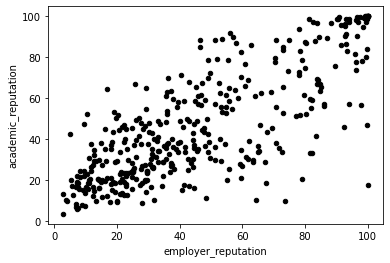

In [265]:
def scatter_plot(df, x, y):
    ax = df.plot.scatter(x, y, color='black', legend = False)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
# TODO: Write a query to select rows from the database where the year is 2019

query8 = pd.read_sql("""
SELECT *
FROM rankings
WHERE year == 2019
""", conn)

# TODO: Call scatter_plot(), passing in employer_reputation and academic_reputation
# column names as x and y respectively

scatter_plot(query8, 'employer_reputation', 'academic_reputation')


### Task 3.3 Make a Horizontal Bar plot of average employer_reputation and average faculty_student_score across all years

Your plot should look like this:
![Horizontal Bar Plot Image](https://github.com/msyamkumar/cs220-s22-projects/raw/main/lab-p13/images/horizontalbarplot.png/)


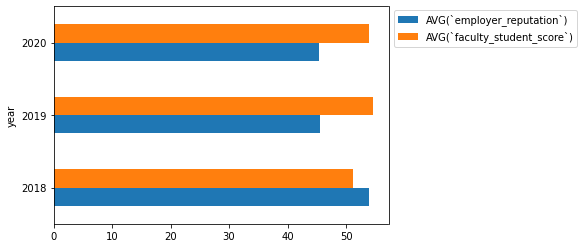

In [113]:
def plot_horizontal_bar(df, x):
    df = df.set_index(x)
    ax = df.plot.barh()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

# TODO: Write a query to select year, average employer reputation, 
# and average faculty student score grouped by year

query9 = pd.read_sql("""
SELECT year, AVG(`employer_reputation`), AVG(`faculty_student_score`)
FROM rankings
GROUP BY year
""", conn)

# TODO: Use plot_horizontal bar to plot the resulting dataframe by "year"

plot_horizontal_bar(query9, 'year')


### Task 3.4 Display a Pie Chart of the average overall score of the top 10 countries in descending order

Your plot should look like this:
![Pie Chart Image](https://github.com/msyamkumar/cs220-s22-projects/raw/main/lab-p13/images/piechart.png/)


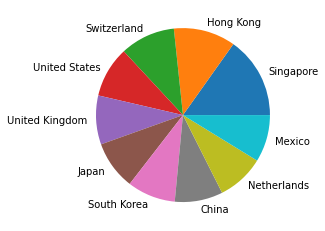

In [269]:
def plot_pie(df, x, y, title=None):
    df = df.set_index(x)
    ax = df.plot.pie(y=y, legend=False)
    ax.set_ylabel(None)
    ax.set_title(title)

# TODO: Write a query to select the top 10 countries based on average overall score

query10 = pd.read_sql("""
SELECT country, AVG(`overall_score`) AS average_score
FROM rankings
GROUP BY country
ORDER BY average_score DESC
LIMIT 10
""", conn)

# TODO: Use plot_pie to illustrate the data, the size of the pie slice is 
# determined by the country's average overall score

plot_pie(query10, 'country', 'average_score')


### Task 3.5 (Optional): Fit a regression line to the data from task 3.2

Your line of best fit should look like this:
![Regression Line](https://github.com/msyamkumar/cs220-s22-projects/raw/main/lab-p13/images/regression.png/)


This Task is optional, which means you may start the project before finishing it. However, you will still need to do this task eventually to complete the project.

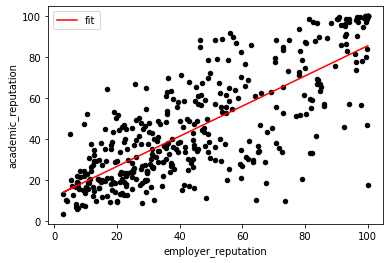

In [280]:
# df: A dataframe

# x: The name of a column in df. The values in this column will be used
# as the x-axis values (independent variable)

# y: The name of a column in df. The values in this column will be used
# as the y-axis values (dependent variable)

# Returns: the slope (m) and y-intercept (b) of the line of best fit

def get_regression_coeff(df, x, y):
    df["1"] = 1
    res = np.linalg.lstsq(df[[x, "1"]], df[y], rcond=None)
    coefficients = res[0]
    m = coefficients[0]
    b = coefficients[1]
    return (m, b)

def plot_regression_line(df, x, y):
    # TODO: Use the get_regression_coeff function to get the slope and
    # intercept of the line of best fit. Save them into variables m and b respectively
    
    reg_coeff= get_regression_coeff(df, x, y)
    
    m = reg_coeff[0]
    b = reg_coeff[1]
    
    # TODO: Use df.plot.scatter (not scatter_plot) to plot the x and y columns in black.
    # and save the return value of scatter to a variable called ax
    
    ax = df.plot.scatter(x, y, color='black', legend = False)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    # TODO: Create a new column in the dataframe called "fit", which is calculated according to 
    # "fit" = m * x + b, where x is a value in the x column of the dataframe.
    
    y = 'fit'
    df[y] = m * df[x] + b
    
    # TODO: Use df.plot.line to plot the fitted line in red, using ax=ax as a keyword argument
    # this ensures that both the scatter plot and line end up on the same plot
    
    df.plot.line(x, y, color = 'Red', ax = ax)


# TODO: Call plot_regression_line on your data from task 3.2 to show the correlation between
# employer_reputation and academic_reputation

plot_regression_line(query8, 'employer_reputation', 'academic_reputation')


In [270]:
a = get_regression_coeff(query8, 'employer_reputation', 'academic_reputation')
print(a)
#print("m:", a[0],"b:", a[1])

(0.7377016454283425, 11.848900105584601)


<AxesSubplot:>

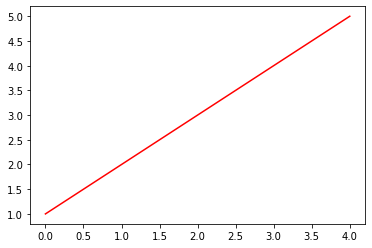

In [164]:
s = pd.Series([1,2,3,4,5])
s.plot.line(color = 'Red')

<AxesSubplot:xlabel='employer_reputation', ylabel='academic_reputation'>

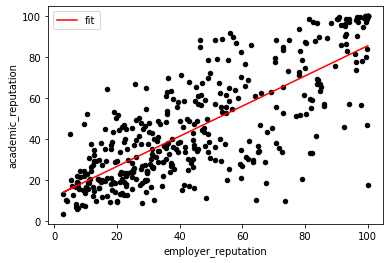

In [235]:
x = 'employer_reputation'
y = 'academic_reputation'
df = query8

a = get_regression_coeff(df, x, y)

ax = df.plot.scatter(x,y, color = 'black')
m = a[0]
b = a[1]

df["fit"] = m * df[x] + b

df.plot.line(x, 'fit', color = 'Red', ax=ax)


Good luck with P13!